# 1. Library Imports

In [1]:
import pandas as pd
import numpy as np
import nltk
import plotly.express as px
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from afinn import Afinn

# 2. Dataset import

In [2]:
df_reviews = pd.read_csv('Data/cleaned_reviews.csv')

df_reviews.shape

(14480, 1)

In [3]:
df_reviews.head()

comments
0  talk stone cold classic genre feels fresh thri...
1  group youngsters discover taking part small ri...
2  danny michael philippou truly something specia...
3  watched talk early part regals mystery monday ...
4  premise initially drew although different simi...

# 3. Lexicon-based technique

In [4]:
# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DRT57226\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\DRT57226\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DRT57226\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
def plot_word_cloud(df, sentiment):
    
    for i in df[sentiment].unique():
        # Concatenate all text from the 'text_column'
        text = " ".join(df[df[sentiment] == i]['comments'])
        
        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
        
        # Display the generated word cloud using matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Word Cloud for Sentiment: {}'.format(i)) # Set the title for the plot
        plt.axis("off")# Turn off axis labels

    return plt.show()

## Vader

In [6]:
# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
df_reviews['compound'] = df_reviews['comments']\
    .apply(lambda x: sid.polarity_scores(x)['compound'])

# Map compound scores to sentiments
df_reviews['sentiment'] = df_reviews['compound']\
    .apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

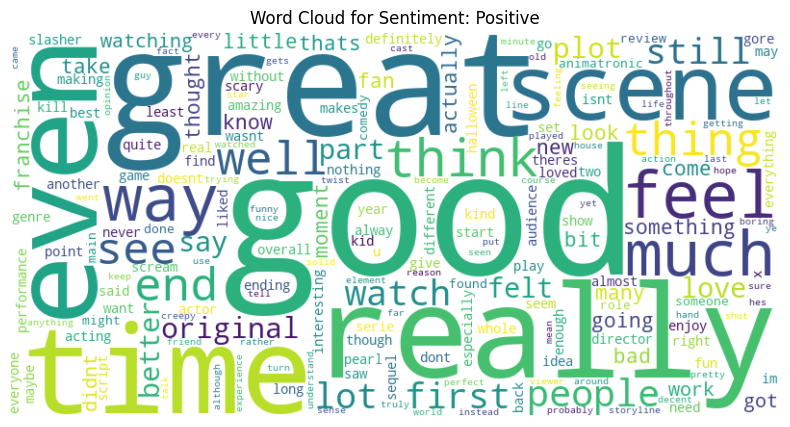

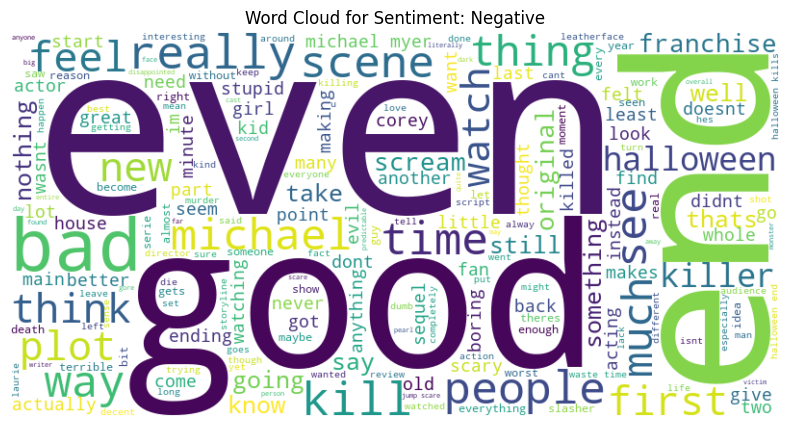

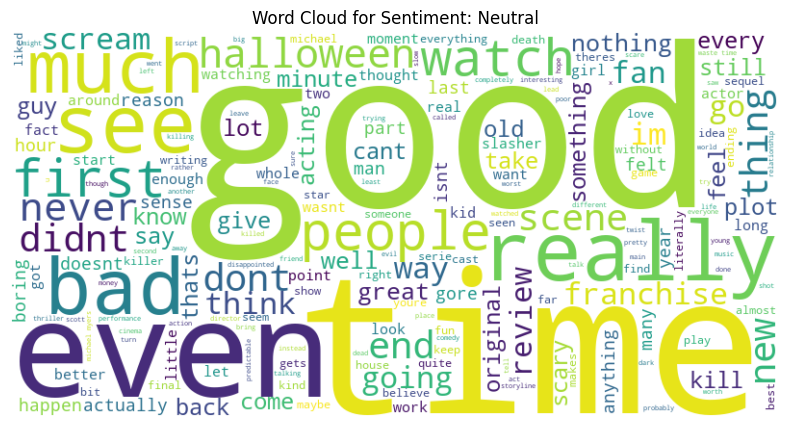

In [7]:
plot_word_cloud(df_reviews, 'sentiment')

## Specific lexycon list (opinion_lexicon)

In [8]:
# Expand and Refine the Lexicon with specific lexicon dictionary
positive_words = set(opinion_lexicon.positive()) # List with positive words
negative_words = set(opinion_lexicon.negative()) # List with negative words

# Function to apply refined sentiment analysis
def refined_lexicon_sentiment(text):
    words = word_tokenize(text.lower())

    # Count positive and negative words
    num_positive = sum(1 for word in words if word in positive_words)
    num_negative = sum(1 for word in words if word in negative_words)

    # Calculate sentiment score
    sentiment_score = num_positive - num_negative

    # Classify sentiment based on the score
    return "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

In [9]:
df_reviews['sentiment2'] = df_reviews['comments'].apply(refined_lexicon_sentiment)

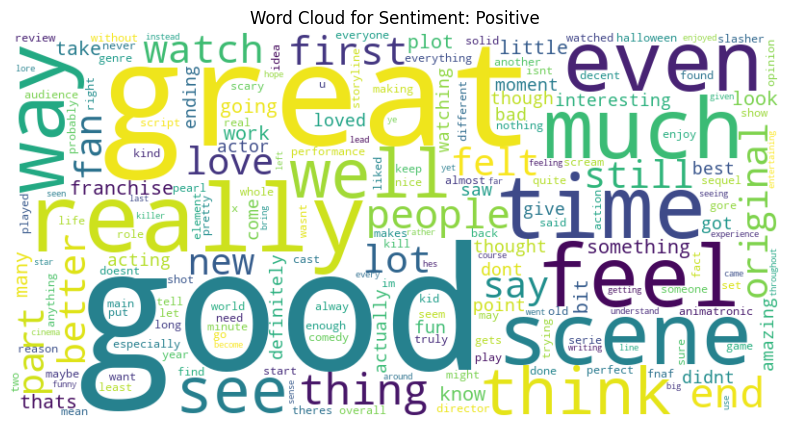

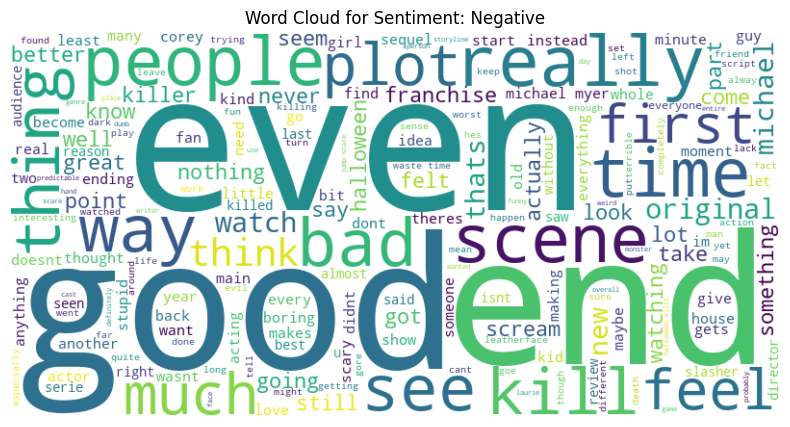

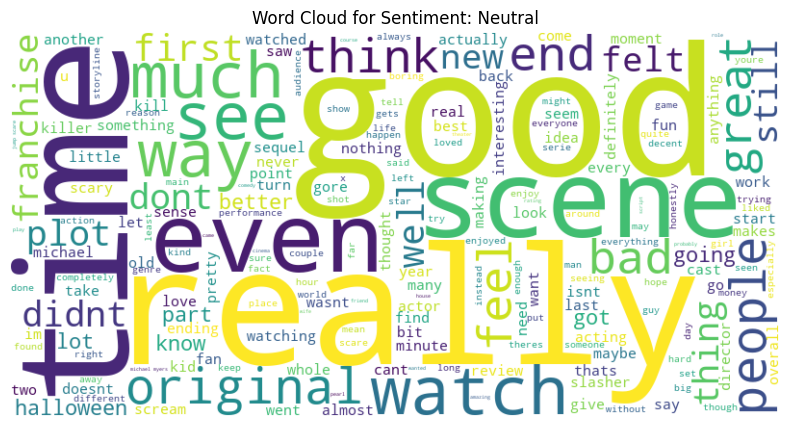

In [10]:
plot_word_cloud(df_reviews, 'sentiment2')

## Specific lexicon list (same as b4) + stemming technique

In [11]:
# Expand and Refine the Lexicon with specific lexicon dictionary and stemming
porter = PorterStemmer()
positive_words_stemmed = set([porter.stem(word) for word in opinion_lexicon.positive()])
negative_words_stemmed = set([porter.stem(word) for word in opinion_lexicon.negative()])

# Define a function to get the sentiment of a sentence
def get_sentiment(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [porter.stem(word) for word in words]
    
    # Count positive and negative words
    num_positive = sum(1 for word in stemmed_words if word in positive_words_stemmed)
    num_negative = sum(1 for word in stemmed_words if word in negative_words_stemmed)
    
    # Assign sentiment based on the count
    if num_positive > num_negative:
        return 'Positive'
    elif num_negative > num_positive:
        return 'Negative'
    else:
        return 'Neutral'

In [12]:
# Apply refined sentiment analysis to each review
df_reviews['sentiment3'] = df_reviews['comments'].apply(get_sentiment)

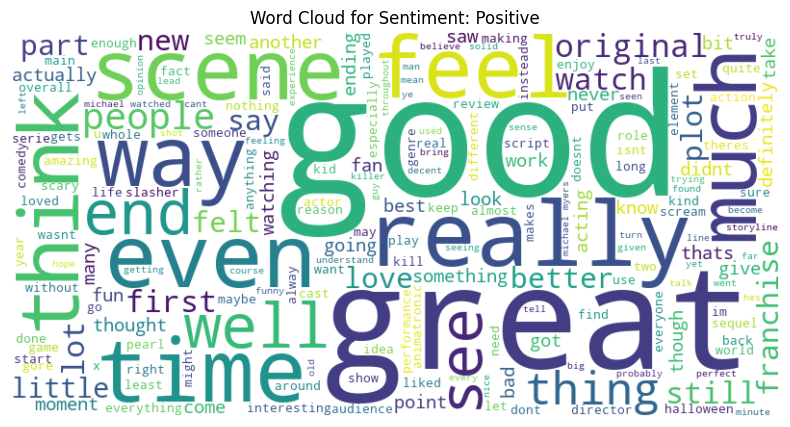

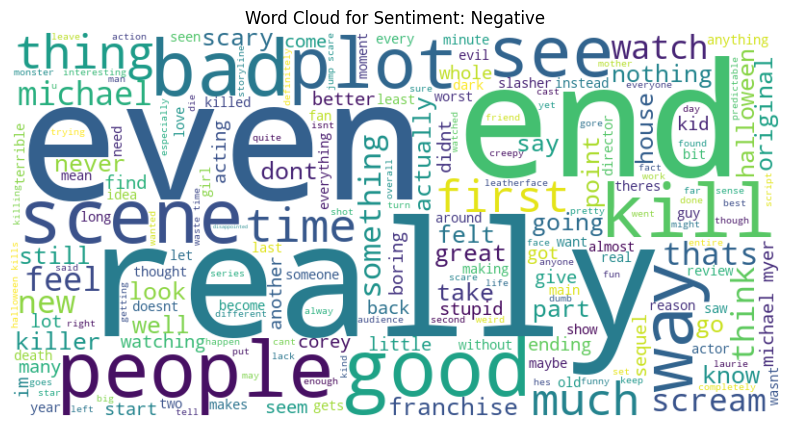

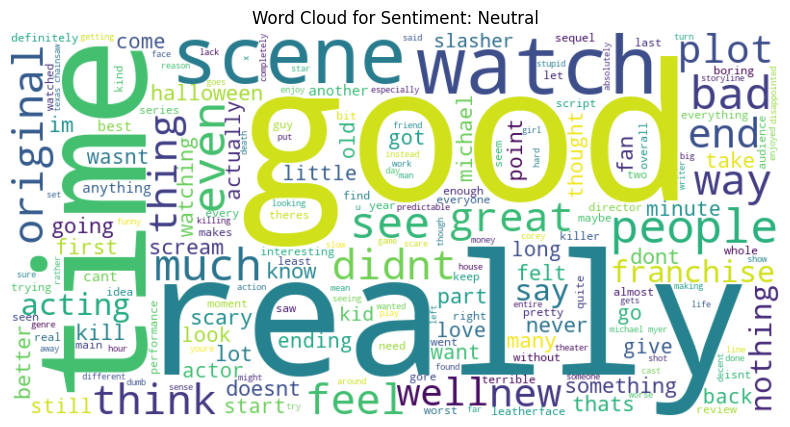

In [13]:
plot_word_cloud(df_reviews, 'sentiment3')

## Afinn

In [14]:
# Initialize the Afinn sentiment analyzer
afinn = Afinn()

# Initialize the Porter stemmer
porter = PorterStemmer()

# Define a function to get the sentiment score of a sentence
def get_sentiment_score(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [porter.stem(word.lower()) for word in words]

    # Calculate sentiment score using Afinn
    sentiment_score = afinn.score(' '.join(stemmed_words))

    return sentiment_score

In [15]:
# Apply sentiment analysis to the 'comments' column and create a new column 'sentiment_score'
df_reviews['sentiment_score'] = df_reviews['comments'].apply(get_sentiment_score)

# Map the sentiment score to a sentiment label (positive, negative, neutral)
df_reviews['sentiment4'] = df_reviews['sentiment_score']\
    .apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

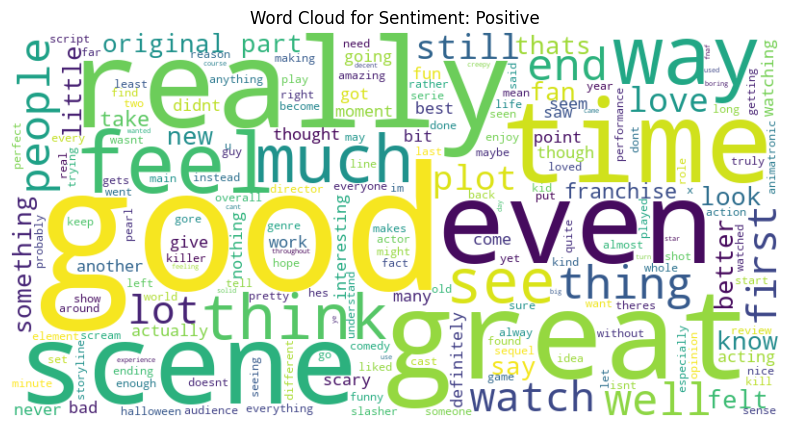

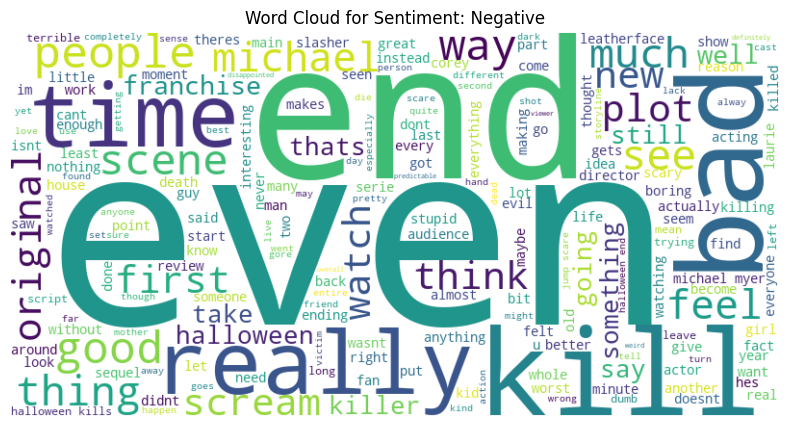

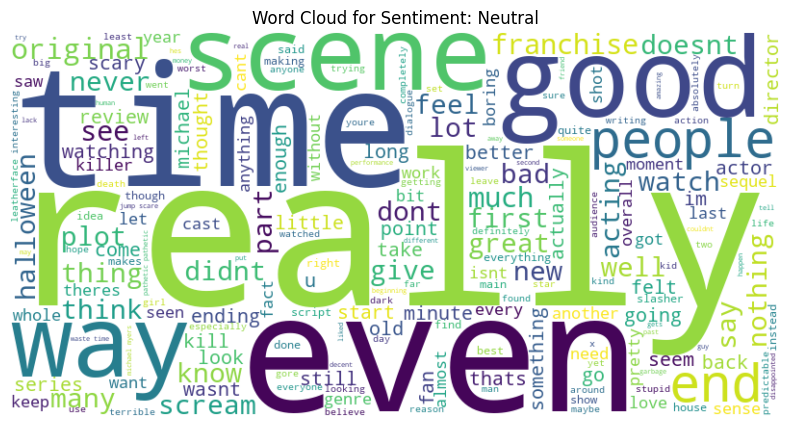

In [16]:
plot_word_cloud(df_reviews, 'sentiment4')